---
<u>**YOLOv11 Detection App**</u>  
*Приложение для детекции фото и видео при помощи YOLOv11 на фреймворке Gradio*  
[GitHub](https://github.com/sergey21000/yolo-detector) репозиторий проекта

---
**Содержание ноутбука:**  
 - Написание веб-приложения на фреймворке Gradio для детекции фото и видео на основе модели из библиотеки Ultralytics YOLOv11
 - Создание Docker образов и запуск контейнеров


---
**YOLO**

Доки Ultralytics YOLO  
https://docs.ultralytics.com/  

Доки список моделей YOLOv8  
https://docs.ultralytics.com/models/yolov8/#supported-tasks-and-modes

Доки список моделей YOLOv11  
https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes

Примеры кода для детекций всех поддерживаемых типов данных YOLOv8   
https://docs.ultralytics.com/modes/predict/#inference-sources

Приложение на Streamlit YOLOv8 Детекция и трекинг  
https://github.com/CodingMantras/yolov8-streamlit-detection-tracking

----
**Gradio**

Доки Gradio  
https://www.gradio.app/main/docs/interface

Быстрый старт Gradio  
https://www.gradio.app/guides/quickstart

Разные туториалы в одном месте  
https://www.gradio.app/guides

Интерактивные примеры интерфейсов где можно менять код и видеть результат  
https://www.gradio.app/playground

Большой тутоиал по Gradio с примерами  
https://proglib.io/p/rukovodstvo-po-rabote-s-gradio-sozdanie-veb-interfeysa-dlya-modeley-mashinnogo-obucheniya-2023-03-06


# Установка библиотек и импорты

In [1]:
# ultralytics для использования моделей YOLO
# youtube_dl для работы с видео youtube (получение инфо о видео, кол-ва кадров)
!pip install -U -q ultralytics gradio yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 878.7/878.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Импорт установленных вручную библиотек

In [3]:
import gradio as gr
import yt_dlp
from ultralytics import YOLO

Импорт установленных в Colab библиотек

In [4]:
import os
import glob
import json
import urllib.request
from pathlib import Path
from typing import List, Dict, Union, Tuple, Literal, Optional
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import cv2
import torch
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 4)
plt.style.use('dark_background')

Просмотр версий установленных библиотек

In [4]:
# текущие версии библиотек от 10/2024
!pip list | grep -P "ultralytics|gradio|opencv-python|gdown|yt-dlp"

# gdown                              5.2.0
# gradio                             5.4.0
# gradio_client                      1.4.2
# opencv-python                      4.10.0.84
# opencv-python-headless             4.10.0.84
# ultralytics                        8.3.25
# ultralytics-thop                   2.0.10
# yt-dlp                             2024.8.6

gdown                              5.2.0
gradio                             5.4.0
gradio_client                      1.4.2
opencv-python                      4.10.0.84
opencv-python-headless             4.10.0.84
ultralytics                        8.3.25
ultralytics-thop                   2.0.10
yt-dlp                             2024.8.6


# Проверка работы функционала

## Загрузка примеров изображения и видео

Свой вариант примеров картинки и видео  
https://drive.google.com/file/d/1h6vR1K2un0okzx2lfjQtuvvzfTBcNXdF/view?usp=sharing  
https://drive.google.com/file/d/1KoPJZlGdQfKPWv1oaGawWqFLp_Z5DXu5/view?usp=sharing

In [5]:
# загрузка примеров с помощью gdown (pip install gdown)
IMAGE_EXAMPLE_PATH = 'слоны.jpg'
VIDEO_EXAMPLE_PATH = 'video_example.mp4'

os.system(f'gdown 1h6vR1K2un0okzx2lfjQtuvvzfTBcNXdF -O "{IMAGE_EXAMPLE_PATH}"')
os.system(f'gdown 1KoPJZlGdQfKPWv1oaGawWqFLp_Z5DXu5 -O "{VIDEO_EXAMPLE_PATH}"')

0

## Загрузка и инициализация модели


Список моделей YOLOv11  
https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes

In [6]:
# загрузка и инициализаиця модели
model = YOLO('yolo11n.pt')

# метки и названия классов на которых обучалась YOLO
YOLO_CLASS_NAMES = model.names

100%|██████████| 5.35M/5.35M [00:00<00:00, 51.1MB/s]


Запись словаря {`индекс_класса`: `название_класса`} в текстовый файл

In [44]:
# записать классы YOLO в JSON файл
# with open('yolo_classes.json', 'w') as file:
#     json.dump(YOLO_CLASS_NAMES, file)

# записать классы YOLO в JSON файл
Path('yolo_classes.json').write_text(json.dumps(YOLO_CLASS_NAMES, indent=4) + '\n')

# прочитать классы YOLO из JSON файла
YOLO_CLASS_NAMES = json.loads(Path('yolo_classes.json').read_text())
YOLO_CLASS_NAMES = {int(k): v for k, v in YOLO_CLASS_NAMES.items()}

## Проверка работы модели на изображении

Примеры кода детекции всех поддерживаемых типов данных YOLO   
https://docs.ultralytics.com/modes/predict/#inference-sources

Параметры метода `predict`  
https://docs.ultralytics.com/modes/predict/#inference-arguments

In [ ]:
%%time

# если нужно сделать инференс на CPU даже когда CUDA доступна
DEVICE = torch.device('cpu')

# детекция с параметрами - порог уверенности класса и порог IOU для отсеивания лишних боксов
# параметр verbose - выводить ли инфо о результатах детекции
# при первом запуске модель работает чуть дольше чем при последующих
# source: Union[str, Path, int, list, tuple, PIL.Image.Image, np.ndarray, torch.Tensor]

detections = model.predict(
    source=IMAGE_EXAMPLE_PATH,
    conf=0.5,  # порог уверенности моделиф
    iou=0.5,  # порог IOU для отсеивания лишних боксов
    verbose=True,  # выводить служебное инфо о процессе и результате детекции
    save=True,  # сохранить результат детекции на диск
    save_txt=False,  # сохранить результаты детекции в текстовом файле
    save_conf=False,  # сохранять уверенность модели в результатах детекции
    device=DEVICE,  # текущий девайс (если не указать то сам выбирает CUDA если доступен)
    )


image 1/1 /content/слоны.jpg: 448x640 3 elephants, 350.2ms
Speed: 17.5ms preprocess, 350.2ms inference, 28.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
CPU times: user 1.05 s, sys: 156 ms, total: 1.21 s
Wall time: 2.24 s


Отрисовка результата детекции

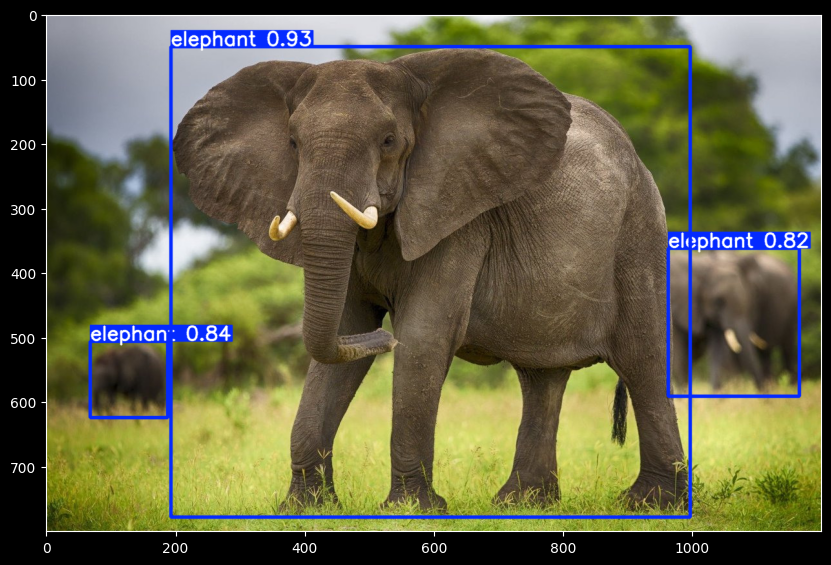

In [ ]:
# detection.plot() делает отрисовку результатов и возвращает картинку в формате numpy
result_np_image = detections[0].plot()
result_np_image = cv2.cvtColor(result_np_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(result_np_image);

Что находится в переменной с результатами детекции

In [ ]:
# возвращает список из объектов Results
# boxes - координаты боксов детекции в режиме детекции
# keypoints - координаты ключевых точек в режиме keypoints детекции
# masks - маски сегментации в режиме сегментации
# names - метки и названия классов на которых обучалась модель
# orig_img, orig_shape, path - оригинальная картинка в формате numpy, ее размерность и путь
# probs - вероятности в режиме классификации
# speed - затраченное время
# и другие артибуты, могут различатся

detections

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
# cls - метки классов для каждого найденного бокса (название класса по метке можно получить из словаря result.names)
# conf - уверенность модели в текущем классе для каждого бокса
# xywh - координаты центра, высота и ширина каждого бокса (не нормированные)
# xywhn - координаты центра, высота и ширина каждого бокса (нормированные в диапазон 0-1)
# xyxy - координаты левого верхнего и правого нижнего углов (не нормированные)
# xyxyn - координаты левого верхнего и правого нижнего углов (нормированные в диапазон 0-1)
detections[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([20., 20., 20.])
conf: tensor([0.9309, 0.8417, 0.8163])
data: tensor([[1.9305e+02, 5.0422e+01, 9.9787e+02, 7.7900e+02, 9.3092e-01, 2.0000e+01],
        [6.8834e+01, 5.0688e+02, 1.8832e+02, 6.2467e+02, 8.4174e-01, 2.0000e+01],
        [9.6375e+02, 3.6229e+02, 1.1667e+03, 5.9104e+02, 8.1634e-01, 2.0000e+01]])
id: None
is_track: False
orig_shape: (800, 1200)
shape: torch.Size([3, 6])
xywh: tensor([[ 595.4592,  414.7105,  804.8119,  728.5760],
        [ 128.5775,  565.7719,  119.4864,  117.7897],
        [1065.2104,  476.6619,  202.9183,  228.7491]])
xywhn: tensor([[0.4962, 0.5184, 0.6707, 0.9107],
        [0.1071, 0.7072, 0.0996, 0.1472],
        [0.8877, 0.5958, 0.1691, 0.2859]])
xyxy: tensor([[ 193.0532,   50.4225,  997.8651,  778.9985],
        [  68.8343,  506.8770,  188.3207,  624.6667],
        [ 963.7513,  362.2874, 1166.6697,  591.0365]])
xyxyn: tensor([[0.1609, 0.0630, 0.8316, 0.9737],
        [0.0574, 0.6336, 

In [ ]:
# отображение результатов как json
print(detections[0].tojson())

WARNING ⚠️ 'result.tojson()' is deprecated, replace with 'result.to_json()'.
[
  {
    "name": "elephant",
    "class": 20,
    "confidence": 0.93092,
    "box": {
      "x1": 193.05324,
      "y1": 50.42249,
      "x2": 997.86511,
      "y2": 778.99847
    }
  },
  {
    "name": "elephant",
    "class": 20,
    "confidence": 0.84174,
    "box": {
      "x1": 68.8343,
      "y1": 506.87698,
      "x2": 188.32069,
      "y2": 624.66669
    }
  },
  {
    "name": "elephant",
    "class": 20,
    "confidence": 0.81634,
    "box": {
      "x1": 963.75134,
      "y1": 362.28738,
      "x2": 1166.66968,
      "y2": 591.0365
    }
  }
]


In [ ]:
from io import StringIO
import pandas as pd

# создать датафрейм из json
json_file = StringIO(detections[0].tojson())
df = pd.read_json(json_file)
df

WARNING ⚠️ 'result.tojson()' is deprecated, replace with 'result.to_json()'.


,name,class,confidence,box
0,elephant,20,0.93092,"{'x1': 193.05324, 'y1': 50.42249, 'x2': 997.86..."
1,elephant,20,0.84174,"{'x1': 68.8343, 'y1': 506.87698, 'x2': 188.320..."
2,elephant,20,0.81634,"{'x1': 963.75134, 'y1': 362.28738, 'x2': 1166...."


Детекция изображения с сохранением результатов с текстовый файл

In [ ]:
# сохранение информации о найденных боксах на изображении в текстовый файл
# c флагом save_txt=True будет создана папка labels и туда будут сохранятся текстовые файлы
# по одному текстовому файлу на каждую картинку
# при детекции видео будет создано столько файлов сколько кадров в нем
detections = model.predict(source=IMAGE_EXAMPLE_PATH, save=True, save_txt=True, save_conf=True)


image 1/1 /content/слоны.jpg: 448x640 3 elephants, 381.0ms
Speed: 7.7ms preprocess, 381.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [ ]:
# результаты сохраняются в формате [class_label, x, y, w, h, confidence], где
# class_label - метка класса (название класса по метке можно получить из словаря result.names)
# x, y, w, h - кооординаты центра, высота и ширина бокса
# confidence - уверенность модели в текущем классе
!cat /content/runs/detect/predict/labels/слоны.txt

20 0.496216 0.518388 0.670677 0.91072 0.930922
20 0.107148 0.707215 0.099572 0.147237 0.841737
20 0.887675 0.595827 0.169099 0.285936 0.816341


In [ ]:
# сохранить результаты отдельной детекции в текстовый файл отдельной командой
# сохраняет в режиме append - каждое сохранение в один и тот же файл дописывает результаты в конец файла
detections[0].save_txt('res.txt', save_conf=True)

In [ ]:
!cat res.txt

20 0.496216 0.518388 0.670677 0.91072 0.930922
20 0.107148 0.707215 0.099572 0.147237 0.841737
20 0.887675 0.595827 0.169099 0.285936 0.816341


In [ ]:
# прочитать текстовый файл в датафрейм
df = pd.read_csv('res.txt', sep=' ', names=['class', 'x', 'y', 'w', 'h', 'conf'])
df

,class,x,y,w,h,conf
0,20,0.496216,0.518388,0.670677,0.910720,0.930922
1,20,0.107148,0.707215,0.099572,0.147237,0.841737
2,20,0.887675,0.595827,0.169099,0.285936,0.816341


Созранение результата детекции на диск отдельно

In [ ]:
# сохранение его на диск изображения с результатами детекций
detections[0].save(filename='result_image.png')

'result_image.png'

## Проверка работы модели на видео

Детекция видео одной командой

In [ ]:
%%time
# save=True сохранит видео с результатами детекции результат в папку runs/detect/
detections = model.predict(source=VIDEO_EXAMPLE_PATH, conf=0.5, iou=0.5, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/192) /content/video_example.mp4: 640x384 1 person, 261.6ms
video 1/1 (frame 2/192) /content/video_example.mp4: 640x384 1 person, 255.3ms
video 1/1 (frame 3/192) /content/video_example.mp4: 640x384 1 person, 181.4ms
video 1/1 (frame 4/192) /content/video_example.mp4: 640x384 1 person, 213.1ms
video 1/1 (frame 5/192) /content/video_example.mp4: 640x384 1 person, 232.0ms
video 1/1 (frame 6/192) /content/video_example.mp4: 640x384 1 pers

In [ ]:
# результаты джетекции каждого кадра (в формате YOLO Results)
len(detections)

192

In [ ]:
# результат детекции
!ls -lh runs/detect/predict

total 13M
drwxr-xr-x 2 root root  12K Oct  8 08:23 labels
-rw-r--r-- 1 root root  12M Oct  8 08:23 video_example.avi
-rw-r--r-- 1 root root 344K Oct  8 08:23 слоны.jpg


Детекция видео в режиме стриминга - возвращает генератор (для экономии памяти для больших файлов)  
В данном примере дполнительно добавляем прогрес бар чтобы удобно было отображать его в приложении

In [ ]:
%%time

# получить кол-во кадров видео через imageio (для того чтобы отобразить прогресс бар)
# import imageio
# vid = imageio.get_reader(video_example_path)
# num_frames = vid.count_frames()

# получить кол-во кадров через open-cv (для того чтобы отобразить прогресс бар)
cap = cv2.VideoCapture(VIDEO_EXAMPLE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

# инициализация прогресс бара
pbar = tqdm(total=total_frames, desc='Детекция видео')

# инициализация генератора
generator = model.predict(
    source=VIDEO_EXAMPLE_PATH,  # путь до видео
    conf=0.5,  # порог уверенности
    iou=0.5,  # порог IOU
    save=True,  # записывать каждый кадр с резульатами детекции в видео при итерации по генератору
    stream=True,  # stream=True возвращает генератор
    verbose=False,  # verbose=False не засоряет вывод инфой о детекции каждого кадра
    )

# итерация по генератору (в качетсве result возвращаются результаты детекции каждого кадра в формате YOLO Results)
for result in generator:
    # обновление прогресс бара
    pbar.update()

Детекция видео:   0%|          | 0/192 [00:00<?, ?it/s]

Results saved to runs/detect/predict
192 labels saved to runs/detect/predict/labels
CPU times: user 28.8 s, sys: 1.25 s, total: 30 s
Wall time: 30.4 s


In [ ]:
# результаты сохраняются в отдельную папку predict в формате avi
result.save_dir

'runs/detect/predict'

In [ ]:
# получить путь до видео с результатом в коде
file_name = Path(result.path).name
result_video_path = Path(result.save_dir) / file_name.replace('.mp4', '.avi')
result_video_path

PosixPath('runs/detect/predict/video_example.avi')

In [ ]:
# резльутат детекции последнего кадра
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

Проверка видео результата детекции

In [ ]:
result_video_path

PosixPath('runs/detect/predict/video_example.avi')

In [ ]:
import moviepy.editor
moviepy.editor.ipython_display(str(result_video_path), width=480, center=False)

ValueError: This video extension cannot be displayed in the IPython Notebook. Allowed extensions: mp4 webm ogv

Если видео не воспроизводится на разном оборудовании то можно его переконвертировать

In [ ]:
# название видео результата конвертации
convert_video_path = 'result_video.mp4'

print('Ковертация...')
os.system(f'ffmpeg -y -an -i "{result_video_path}" -codec:v libx264 "{convert_video_path}"')

Ковертация...


0

Отобразить видео в Colab

In [ ]:
import moviepy.editor
moviepy.editor.ipython_display(convert_video_path, width=640, height=480, center=False)

Вариант конвертации видео через `python-ffmpeg`

In [ ]:
!pip install -q python-ffmpeg

In [ ]:
from ffmpeg import FFmpeg, Progress

# название видео результата конвертации
convert_video_path = 'result_video.mp4'

# инициализация объекта FFmpeg и конвертация
ffmpeg = (FFmpeg().option('y') \
    .input(result_video_path) \
    .output(convert_video_path, options={'codec:v': 'libx264'}) \
    .option('an') \
    )
ffmpeg.execute()

b''

In [ ]:
# как выглядит запрос в терминале
str(ffmpeg.arguments)

"['ffmpeg', '-y', '-an', '-i', 'runs/detect/predict/video_example.avi', '-codec:v', 'libx264', 'result_video.mp4']"

Вариант конвертации видео через `ffmpy` (устанавливается вместе с `gradio`)

In [ ]:
!pip install -q ffmpy

In [ ]:
from ffmpy import FFmpeg

# название видео результата конвертации
convert_video_path = 'result_video.mp4'

# инициализация объекта FFmpeg и конвертация
ffmpeg = FFmpeg(
    global_options='-y',
    inputs={result_video_path: None},
    outputs={convert_video_path: None},
)
ffmpeg.run()

(None, None)

In [ ]:
# как выглядит запрос в терминале
ffmpeg

<'FFmpeg' 'ffmpeg -y -i runs/detect/predict/video_example.avi result_video.mp4'>

In [ ]:
ffmpeg = FFmpeg(global_options='-y', inputs={'video_example.mp4': None}, outputs={'res.mp4': None})
ffmpeg.run()

(None, None)

## Код для детекции видео через `opencv`

Вариант детекции видео и записи результатов в другое видео вручную через `open-cv`  
В данном примере вместо YOLO можно подставить любой детектор, способный сделать детекцию одного изображения  

Код для детекции видео.  
OpenCV покадрово считывает видеофайл, каждый кадр предиктится с помощью YOLO, на нем отрисовываются результаты детекции и затем он записывается в новое видео

In [ ]:
%%time

# CPU time: 27 s

# путь до видео которое нужно считывать покадрово
video_example_path = 'video_example.mp4'

# объект видеозахвата через который происходить считывание
cap = cv2.VideoCapture(video_example_path)

# получение параметров, ширина высота fps и кол-во вреймов видео
# через cap.set их можно установить например установить ширину cap.set(3, 640)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_fps = int(cap.get(5))
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# название для видео в которое будет записывать кадры
result_video_path = "result_video.mp4"

# объект для записи видео, параметры высоты и ширины должны совпадать с размерами передаваемых кадров
out_cap = cv2.VideoWriter(
    filename=result_video_path,
    fourcc=cv2.VideoWriter_fourcc(*'mp4v'),  # codec: mp4v, fmp4, avc1, h264
    fps=frame_fps,  # FPS
    frameSize=(frame_width, frame_height),
    )

# считывание исходного видео покадрово в бесконечном цикле
while cap.isOpened():
    ret, frame = cap.read()
    # если кадр прочитался то производим детекцию и записываем результат в новое видео out_cap
    if ret:
        # здесь вместо yolo может быть другой детектор, главное не только найти боксы но и отрисовать их
        detections = model.predict(source=frame, save=False, verbose=False)
        result_np_image = detections[0].plot()
        # записать фрейм в видео (в формате BGR)
        out_cap.write(result_np_image)

    # если кадры закончились или не прочитались по другим причинам то останавливаем бесконечный цикл
    else:
        break

# в конце нужно закрыть все объекты для чтения и записи видео и закрыть все окна
out_cap.release()
cap.release()
cv2.destroyAllWindows()

Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict/labels
Results saved to runs/detect/predict
193 labels saved to runs/detect/predict

In [ ]:
%%time
# конвертация если видео не воспроизводится
convert_video_path = 'convert_video.mp4'
print('Ковертация...')
os.system(f'ffmpeg -y -i "{result_video_path}" "{convert_video_path}"')

Ковертация...
CPU times: user 22 ms, sys: 6 ms, total: 28 ms
Wall time: 4.09 s


0

Отобразить видео в Colab

In [ ]:
import moviepy.editor
moviepy.editor.ipython_display(convert_video_path, width=360, center=False)

## Проверка открытия видео в Gradio

Проверка открытия видео в Gradio  
Если видео не может быть воспроизведено в браузере, Gradio попытается автоматически перегнать его в нужный формат  
(в данном примере из `avi` в `mp4`)

Пример с отображением вижео через `gr.Blocks()`

In [ ]:
import gradio as gr

# создание интерфейса
with gr.Blocks() as interface:
    # считывание видеофайла по пути на диске или url (можно указать sources='webcam'для веб камеры)
    gr.Video('runs/detect/predict/video_example.avi', width=640, height=480)

# запуск интерфейса
# interface.launch(debug=True) для отладки ошибок
interface.launch(debug=True)

Пример с отображением вижео через `gr.Interface()`

In [ ]:
import gradio as gr

# компоненты для отображения - на входе видео и на выходе видео
input_component = gr.Video(VIDEO_EXAMPLE_PATH, height=320, width=240)
output_component = gr.Video(convert_video_path, height=320, width=240)

# создание интерфейса
iface = gr.Interface(
    fn=lambda _: convert_video_path,  # главная функция интерфейса fn
    inputs=input_component,  # вход для функции fn
    outputs=output_component,  # выход для функции fn
    )

# запуск интерфейса в режиме отладки
iface.launch(debug=True)

## Детекция видео c сохранением аннотаций в таблицу

**Детекция видео по ссылке YouTube с прогресс баром и сохранением результатов детекции в текстовые файлы с последующим чтением в датафрейм Pandas**  
Еще примеры как сохранять результаты в текстовый файл в обсуждении  
https://github.com/ultralytics/ultralytics/issues/2143

Загрузка видео с TikTok (опционально)

In [7]:
!pip install -q tiktok_downloader

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
# https://vt.tiktok.com/ZS2CSoHw1/
# https://vt.tiktok.com/ZS2CSrDNu/
# https://vt.tiktok.com/ZS2FfmSpn/
# https://vt.tiktok.com/ZSjFaWkD1/  # 51 сек
# https://vt.tiktok.com/ZSjFavTJN/  # 45 сек
# https://vt.tiktok.com/ZSjFannw6/  # 23 сек
# https://vt.tiktok.com/ZSjFamN59/  # 50 сек

# название итогового видео
video_path = 'tiktok.mp4'

# загрузка видео
!python3 -m tiktok_downloader --url https://vt.tiktok.com/ZS2FfmSpn/ --snaptik --save "{video_path}"

Загрузка видео с YouTube

In [ ]:
# ссыылка на видео YouTube
yt_video_link = 'https://www.youtube.com/shorts/x7swHQGdRds'

# загрузка видео с YouTube
ydl_opts = {'format': 'bestvideo[height<=720]'}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    video_info_dict = ydl.extract_info(yt_video_link, download=True)
    video_path = ydl.prepare_filename(video_info_dict)
video_path

[youtube] Extracting URL: https://www.youtube.com/shorts/x7swHQGdRds
[youtube] x7swHQGdRds: Downloading webpage
[youtube] x7swHQGdRds: Downloading ios player API JSON
[youtube] x7swHQGdRds: Downloading web creator player API JSON
[youtube] x7swHQGdRds: Downloading player 34059770
[youtube] x7swHQGdRds: Downloading m3u8 information
[info] x7swHQGdRds: Downloading 1 format(s): 243
[download] Destination: Спас белую акулу Приморский край со Триозерье [x7swHQGdRds].webm
[download] 100% of  629.73KiB in 00:00:00 at 10.54MiB/s  


'Спас белую акулу Приморский край со Триозерье [x7swHQGdRds].webm'

Детекция видео с сохранением аннотаций в текстовые файлы

In [ ]:
%%time

# 3min для видео длительностью 30 сек на CPU

# получить кол-во кадров через open-cv (для того чтобы отобразить прогресс бар)
cap = cv2.VideoCapture(video_path)
frames_fps = int(cap.get(cv2.CAP_PROP_FPS))  # 5
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # 7
cap.release()

# инициализация прогресс бара
pbar = tqdm(total=total_frames, desc='Детекция видео')

# инициализация генератора
generator = model.predict(
    source=video_path,  # путь до видео
    conf=0.5,  # порог уверенности
    iou=0.5,  # порог IOU
    save=True,  # сохранить видео результат на диск
    save_txt=True,  # сохранить результаты детекции в текстовом файле
    save_conf=True,  # сохранять уверенность модели в результатах детекции
    stream=True,  # stream=True возвращает генератор
    verbose=False,  # verbose=False не засоряет вывод инфой о детекции каждого кадра
    )

# итерация по генератору (в качетсве result возвращаются результаты детекции каждого кадра в формате YOLO Results)
for result in generator:
    # обновление прогресс бара
    pbar.update()

Детекция видео:   0%|          | 0/854 [00:00<?, ?it/s]

Results saved to runs/detect/predict
529 labels saved to runs/detect/predict/labels
CPU times: user 2min 4s, sys: 895 ms, total: 2min 5s
Wall time: 2min 29s


In [ ]:
# получить путь до видео с результатом в коде
file_name = Path(result.path).with_suffix('.avi').name
result_video_path = Path(result.save_dir) / file_name
# получить путь до папки с аннотациями к видео
txts_path = Path(result.save_dir) / 'labels'

result_video_path, txts_path

(PosixPath('runs/detect/predict/Спас белую акулу Приморский край со Триозерье [x7swHQGdRds].avi'),
 PosixPath('runs/detect/predict/labels'))

In [ ]:
# текстовые результаты сохраняются для каждого кадра в папку labels
!ls -lh "{result.save_dir}"/labels | head -10

total 2.2M
-rw-r--r-- 1 root root 73K Oct  8 08:39 image0.txt
-rw-r--r-- 1 root root  47 Oct  8 08:41 tiktok_10.txt
-rw-r--r-- 1 root root  46 Oct  8 08:41 tiktok_11.txt
-rw-r--r-- 1 root root  45 Oct  8 08:41 tiktok_12.txt
-rw-r--r-- 1 root root  46 Oct  8 08:41 tiktok_13.txt
-rw-r--r-- 1 root root  44 Oct  8 08:41 tiktok_14.txt
-rw-r--r-- 1 root root  47 Oct  8 08:41 tiktok_15.txt
-rw-r--r-- 1 root root  47 Oct  8 08:41 tiktok_16.txt
-rw-r--r-- 1 root root  47 Oct  8 08:42 tiktok_17.txt


Чтение аннотаций к видео из текстовых файлов в датафрейм и сохранение в формат `csv`  
Каждая строка представляет собой кадр из видео  
Если на одном кадре обнаружено несколько объектов то он будет дублироваться  
Если на кадре ничего не обранужено то его не будет в датафрейме, но в коде ниже представлено несколько вариантов датафрейма  

Датафрейм имеет следующие столбцы:
 - `frame_number` - порядковый номер текущего кадра из видео
 - `frame_sec` - текущая секунда видео для текущего кадра
 - `class_name` - имя класса для текущего бокса
 - `class_label` - имя класса для текущего бокса
 - `x` - коррдината x центра текущего бокса
 - `y` - коррдината y центра текущего бокса
 - `w` - ширина для текущего бокса
 - `h` - высота текущего бокса
 - `conf` - увереность для текущего бокса

In [ ]:
# список для сбора элементов [frame_number, class_label, x, y, w, h, confidence]
df_list = []

# получение путей до текстовых файлов которые соотвествуют только текущему видео
escaped_pattern = glob.escape(result_video_path.stem)
matching_txts_path = sorted(txts_path.glob(f'{escaped_pattern}_*.txt'), key=os.path.getmtime)

# итерация по аннотациям к видео в виде тектсовых файлов и изслечение из них результатов детекций
for txt_path in matching_txts_path:
    frame_number = int(txt_path.stem.rsplit('_')[-1])
    with open(txt_path) as file:
        df_rows = file.readlines()
        for df_row in df_rows:
            df_row = map(float, df_row.split())
            df_list.append((frame_number, *df_row))

# создание датафрейма
column_names = ['frame_number', 'class_label', 'x', 'y', 'w', 'h', 'conf']
df = pd.DataFrame(df_list, columns=column_names)

# создание столбца с именами классов
df.class_label = df.class_label.astype(int)
class_name_series = df.class_label.map(YOLO_CLASS_NAMES)
df.insert(loc=1, column='class_name', value=class_name_series)

# получить значение fps чтобы добавить столбец с секундами
cap = cv2.VideoCapture(str(result_video_path))
frames_fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

# создание столбца со значение м секунды текущего кадра
frame_sec_series = df.frame_number / frames_fps
df.insert(loc=1, column='frame_sec', value=frame_sec_series)

# заполнение отсутсвующих кадров в датафрейме значениями Nan,
# чтобы каждая строка датафрейма представляла каждый кадр видео
full_frames = pd.DataFrame({'frame_number': range(total_frames)})
df = pd.merge(full_frames, df, on='frame_number', how='outer')
df.frame_sec = df.frame_number / frames_fps

# сохранение датафрейма на диск в формате cvs
result_csv_path = f'{result_video_path.stem}_annotations.csv'
df.to_csv(result_csv_path, index=False)

In [ ]:
df

,frame_number,frame_sec,class_name,class_label,x,y,w,h,conf
0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.034483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.068966,person,0.0,0.731146,0.584082,0.537709,0.827824,0.675758
3,3,0.103448,person,0.0,0.735782,0.584577,0.528437,0.826895,0.663771
4,4,0.137931,person,0.0,0.649064,0.594577,0.699718,0.807679,0.879927
...,...,...,...,...,...,...,...,...,...
865,849,29.275862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,850,29.310345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,851,29.344828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,852,29.379310,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Отрисовка графиков аннотаций в Colab

Чтение датафрейма

In [ ]:
# df = pd.read_csv(result_csv_path)
df = pd.read_csv('/content/Спас белую акулу Приморский край со Триозерье [x7swHQGdRds]_annotations.csv')

In [ ]:
df.shape

(870, 9)

На первых кадрах видео не найдено объектов поэтому там записано NaN

In [ ]:
df[:5]

,frame_number,frame_sec,class_name,class_label,x,y,w,h,conf
0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.034483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.068966,person,0.0,0.731146,0.584082,0.537709,0.827824,0.675758
3,3,0.103448,person,0.0,0.735782,0.584577,0.528437,0.826895,0.663771
4,4,0.137931,person,0.0,0.649064,0.594577,0.699718,0.807679,0.879927


Фрагмент датафрейма где на кадрах под номерами 71 и 72 обнаружены два объекта

In [ ]:
df[70:76]

,frame_number,frame_sec,class_name,class_label,x,y,w,h,conf
70,70,2.413793,person,0.0,0.500923,0.611356,0.994902,0.773443,0.957442
71,71,2.448276,person,0.0,0.500457,0.613374,0.993779,0.769323,0.957640
72,71,2.448276,truck,7.0,0.734547,0.250415,0.226599,0.081892,0.565842
73,72,2.482759,person,0.0,0.499762,0.613262,0.992698,0.769556,0.958014
74,72,2.482759,truck,7.0,0.734955,0.250347,0.227381,0.081616,0.558291
75,73,2.517241,person,0.0,0.501217,0.616581,0.994021,0.763276,0.957558


Фрагмент датафрейма где на кадре 106 не найдено объектов

In [ ]:
df[105:110]

,frame_number,frame_sec,class_name,class_label,x,y,w,h,conf
105,103,3.551724,person,0.0,0.638653,0.638255,0.716917,0.719320,0.913560
106,104,3.586207,person,0.0,0.706356,0.655003,0.587288,0.686272,0.890331
107,105,3.620690,person,0.0,0.706437,0.654371,0.586030,0.686143,0.883535
108,106,3.655172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,107,3.689655,car,2.0,0.823426,0.103032,0.142366,0.043684,0.524222


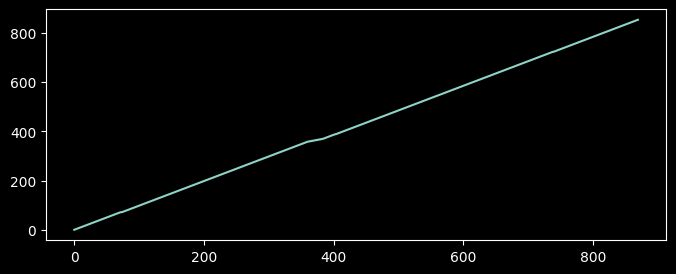

In [ ]:
# прямая детекций
df.frame_number.plot(figsize=(8, 3));

---

Анализ уверенности детекции

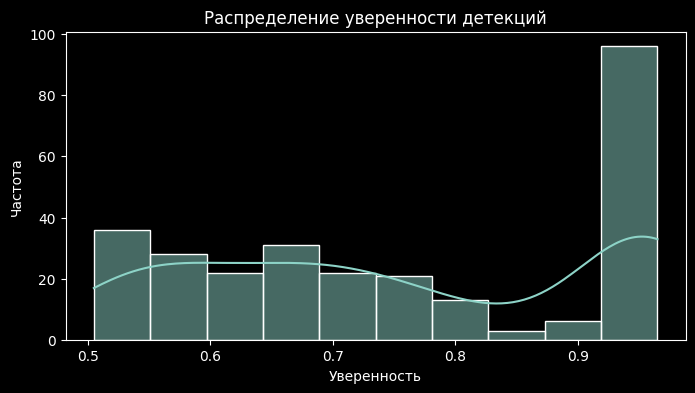

In [ ]:
# визуализация распределения уверенности
sns.histplot(df['conf'].dropna(), kde=True)
plt.title('Распределение уверенности детекций')
plt.xlabel('Уверенность')
plt.ylabel('Частота')
plt.show()

Распределение уверенности по классам

  positions = grouped.grouper.result_index.to_numpy(dtype=float)



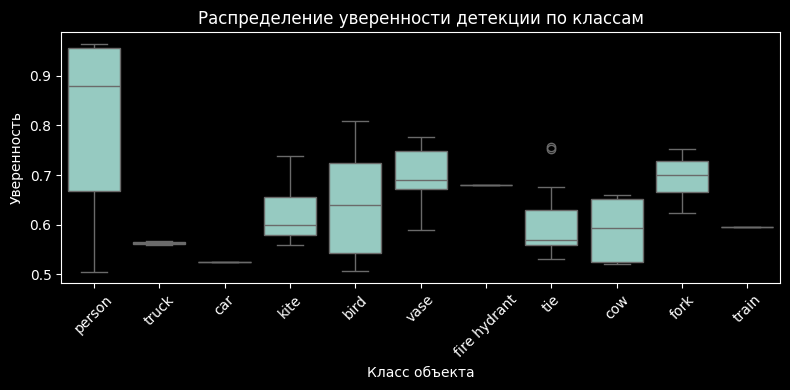

In [ ]:
# анализ уверенности по классам
sns.boxplot(x='class_name', y='conf', data=df.dropna())
plt.title('Распределение уверенности детекции по классам')
plt.xlabel('Класс объекта')
plt.ylabel('Уверенность')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

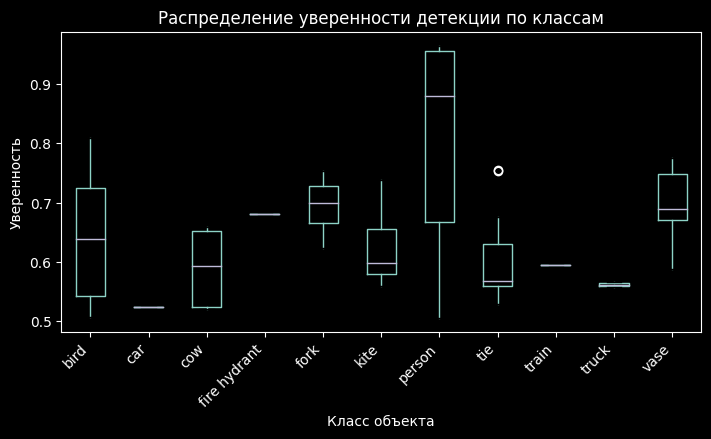

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
df.boxplot(column='conf', by='class_name', ax=ax)
ax.set_title('Распределение уверенности детекции по классам')
ax.set_xlabel('Класс объекта')
ax.set_ylabel('Уверенность')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.suptitle('')
plt.show()

Анализ частоты обнаружения объектов

In [ ]:
total_frames = len(df)
frames_with_detections = df['class_name'].notna().sum()
detection_rate = frames_with_detections / total_frames

print(f"Всего кадров: {total_frames}")
print(f"Кадров с обнаружениями: {frames_with_detections}")
print(f"Частота обнаружений: {detection_rate:.2%}")

Всего кадров: 870
Кадров с обнаружениями: 278
Частота обнаружений: 31.95%


In [ ]:
# количество детекций на каждый кадр
detections_every_frame = df.groupby('frame_number').size()
detections_detect_frame = df.dropna().groupby('frame_number').size()
# среднее количество объектов на кадр
print(f"Среднее количество объектов на кадр среди кадров с детекциями: {detections_detect_frame.mean():.2f}")
print(f"Среднее количество объектов на кадр среди всех кадров: {detections_every_frame.mean():.2f}")

Среднее количество объектов на кадр среди кадров с детекциями: 1.06
Среднее количество объектов на кадр среди всех кадров: 1.02


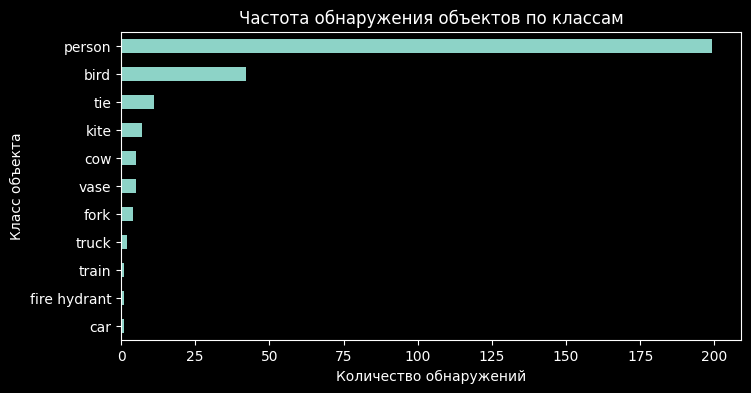

In [ ]:
# визуализация частоты обнаружения по классам
df['class_name'].value_counts(ascending=True).plot(kind='barh')
plt.title('Частота обнаружения объектов по классам')
plt.xlabel('Количество обнаружений')
plt.ylabel('Класс объекта')
plt.show()

Кадры с наибольшим количеством детекций

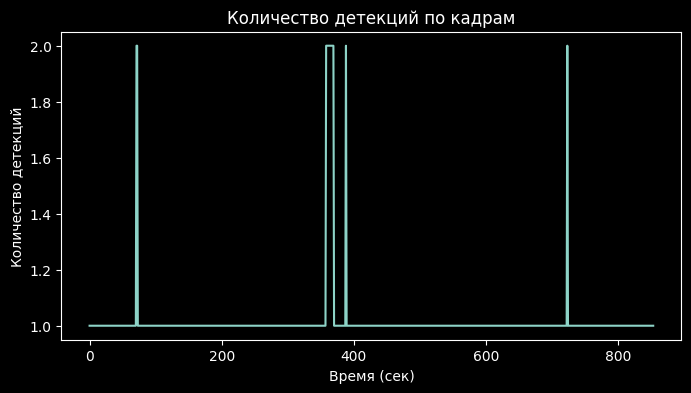

In [ ]:
# группировка по номеру кадра и подсчет количества детекций
detections_over_time = df.groupby('frame_number').size()
detections_over_time.plot(kind='line')
plt.xlabel('Время (сек)')
plt.ylabel('Количество детекций')
plt.title('Количество детекций по кадрам')
plt.show()

Секунды с наибольшим количеством детекций

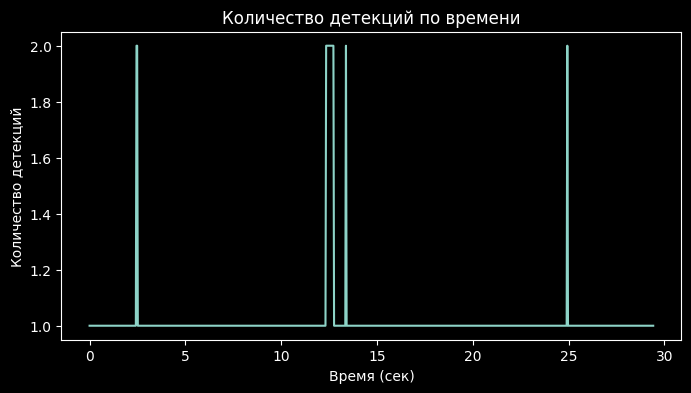

In [ ]:
# группировка по времени (секундам) и подсчет количества детекций
detections_over_time = df.groupby('frame_sec').size()
detections_over_time.plot(kind='line')
plt.xlabel('Время (сек)')
plt.ylabel('Количество детекций')
plt.title('Количество детекций по времени')
plt.show()

Какие классы в какое время были обнаружены

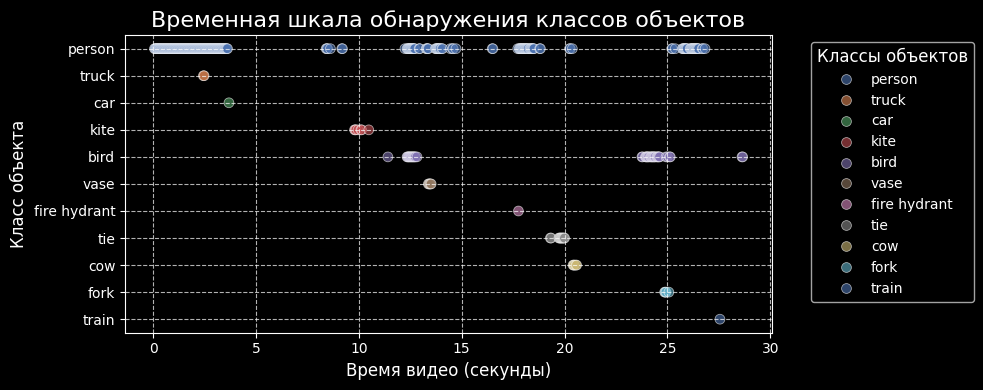

In [ ]:
# отсеить строки только с обнаружениями
detections = df.dropna(subset=['class_name'])
plt.figure(figsize=(10, 4))
sns.scatterplot(data=detections, x='frame_sec', y='class_name', hue='class_name', palette='deep', s=50, alpha=0.6)
plt.title('Временная шкала обнаружения классов объектов', fontsize=16)
plt.xlabel('Время видео (секунды)', fontsize=12)
plt.ylabel('Класс объекта', fontsize=12)
plt.legend(title='Классы объектов', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

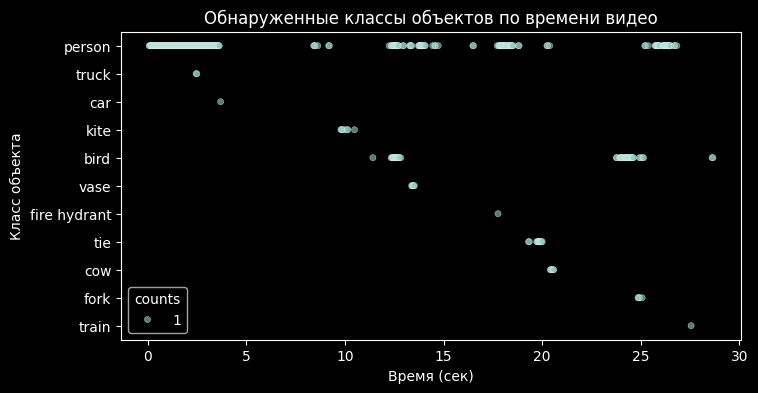

In [ ]:
detected = df.dropna(subset=['class_name'])
detections_time_class = detected.groupby(['frame_sec', 'class_name']).size().reset_index(name='counts')
sns.scatterplot(data=detections_time_class, x='frame_sec', y='class_name', size='counts', sizes=(20, 200), alpha=0.6)
plt.xlabel('Время (сек)')
plt.ylabel('Класс объекта')
plt.title('Обнаруженные классы объектов по времени видео')
plt.show()

## Детекция видео и отрисовка графиков аннотаций в Gradio

Документация Gradio по отрисовке графиков  
https://www.gradio.app/guides/creating-plots

Импорты

In [43]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'figure.figsize': (12, 20)})
plt.rcParams.update({'font.size': 9})

Загрузка видео

In [ ]:
!pip install -q tiktok_downloader

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.8 MB/s eta 0:00:00


In [8]:
# название итогового видео
video_path = 'tiktok.mp4'

In [8]:
# https://vt.tiktok.com/ZS2CSoHw1/
# https://vt.tiktok.com/ZS2CSrDNu/
# https://vt.tiktok.com/ZS2FfmSpn/
# https://vt.tiktok.com/ZSjFaWkD1/  # 51 сек
# https://vt.tiktok.com/ZSjFavTJN/  # 45 сек
# https://vt.tiktok.com/ZSjFannw6/  # 23 сек
# https://vt.tiktok.com/ZSjFamN59/  # 50 сек

# загрузка видео
!python3 -m tiktok_downloader --url https://vt.tiktok.com/ZSjFavTJN/ --snaptik --save "{video_path}"

Детекция видео с сохранением аннотаций в текстовые файлы и формирование датасета с результатами

In [9]:
%%time

# 3min для видео длительностью 30 сек на CPU

# получить кол-во кадров через open-cv (для того чтобы отобразить прогресс бар)
cap = cv2.VideoCapture(video_path)
frames_fps = int(cap.get(cv2.CAP_PROP_FPS))  # 5
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # 7
cap.release()

# инициализация прогресс бара
pbar = tqdm(total=total_frames, desc='Детекция видео')

# загрузка и инициализаиця модели
model = YOLO('yolo11n.pt')
# метки и названия классов на которых обучалась YOLO
YOLO_CLASS_NAMES = model.names

# инициализация генератора
generator = model.predict(
    source=video_path,  # путь до видео
    conf=0.5,  # порог уверенности
    iou=0.5,  # порог IOU
    save=True,  # сохранить видео результат на диск
    save_txt=True,  # сохранить результаты детекции в текстовом файле
    save_conf=True,  # сохранять уверенность модели в результатах детекции
    stream=True,  # stream=True возвращает генератор
    verbose=False,  # verbose=False не засоряет вывод инфой о детекции каждого кадра
    )

# итерация по генератору (в качетсве result возвращаются результаты детекции каждого кадра в формате YOLO Results)
for result in generator:
    # обновление прогресс бара
    pbar.update()

# получить путь до видео с результатом в коде
file_name = Path(result.path).with_suffix('.avi').name
result_video_path = Path(result.save_dir) / file_name
# получить путь до папки с аннотациями к видео
txts_path = Path(result.save_dir) / 'labels'

# список для сбора элементов [frame_number, class_label, x, y, w, h, confidence]
df_list = []

# получение путей до текстовых файлов которые соотвествуют только текущему видео
escaped_pattern = glob.escape(result_video_path.stem)
matching_txts_path = sorted(txts_path.glob(f'{escaped_pattern}_*.txt'), key=os.path.getmtime)

# итерация по аннотациям к видео в виде тектсовых файлов и изслечение из них результатов детекций
for txt_path in matching_txts_path:
    frame_number = int(txt_path.stem.rsplit('_')[-1])
    with open(txt_path) as file:
        df_rows = file.readlines()
        for df_row in df_rows:
            df_row = map(float, df_row.split())
            df_list.append((frame_number, *df_row))

# создание датафрейма
column_names = ['frame_number', 'class_label', 'x', 'y', 'w', 'h', 'conf']
df = pd.DataFrame(df_list, columns=column_names)

# создание столбца с именами классов
df.class_label = df.class_label.astype(int)
class_name_series = df.class_label.map(YOLO_CLASS_NAMES)
df.insert(loc=1, column='class_name', value=class_name_series)

# получить значение fps чтобы добавить столбец с секундами
cap = cv2.VideoCapture(str(result_video_path))
frames_fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

# создание столбца со значение м секунды текущего кадра
frame_sec_series = df.frame_number / frames_fps
df.insert(loc=1, column='frame_sec', value=frame_sec_series)

# заполнение отсутсвующих кадров в датафрейме значениями Nan,
# чтобы каждая строка датафрейма представляла каждый кадр видео
full_frames = pd.DataFrame({'frame_number': range(total_frames)})
df = pd.merge(full_frames, df, on='frame_number', how='outer')
df.frame_sec = df.frame_number / frames_fps

# добавления столбца с флагом обнаружен ли бокс на кадре
df['box_detected'] = df['class_name'].notna().astype(int)

# сохранение датафрейма на диск в формате cvs
result_csv_path = f'{result_video_path.stem}_annotations.csv'
df.to_csv(result_csv_path, index=False)

Детекция видео:   0%|          | 0/1372 [00:00<?, ?it/s]

Results saved to runs/detect/predict2
1370 labels saved to runs/detect/predict2/labels
CPU times: user 3min 36s, sys: 6.47 s, total: 3min 43s
Wall time: 3min 51s


Чтение датасета

In [10]:
df = pd.read_csv(result_csv_path)
df_clean = df.dropna(subset=['class_name'])

In [20]:
df.head(3)

,frame_number,frame_sec,class_name,class_label,x,y,w,h,conf,box_detected
0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,0.033333,person,0.0,0.501397,0.551739,0.996026,0.593579,0.939109,1
2,1,0.033333,person,0.0,0.820210,0.476815,0.357578,0.432272,0.811839,1


Отрисовка графиков в Colab

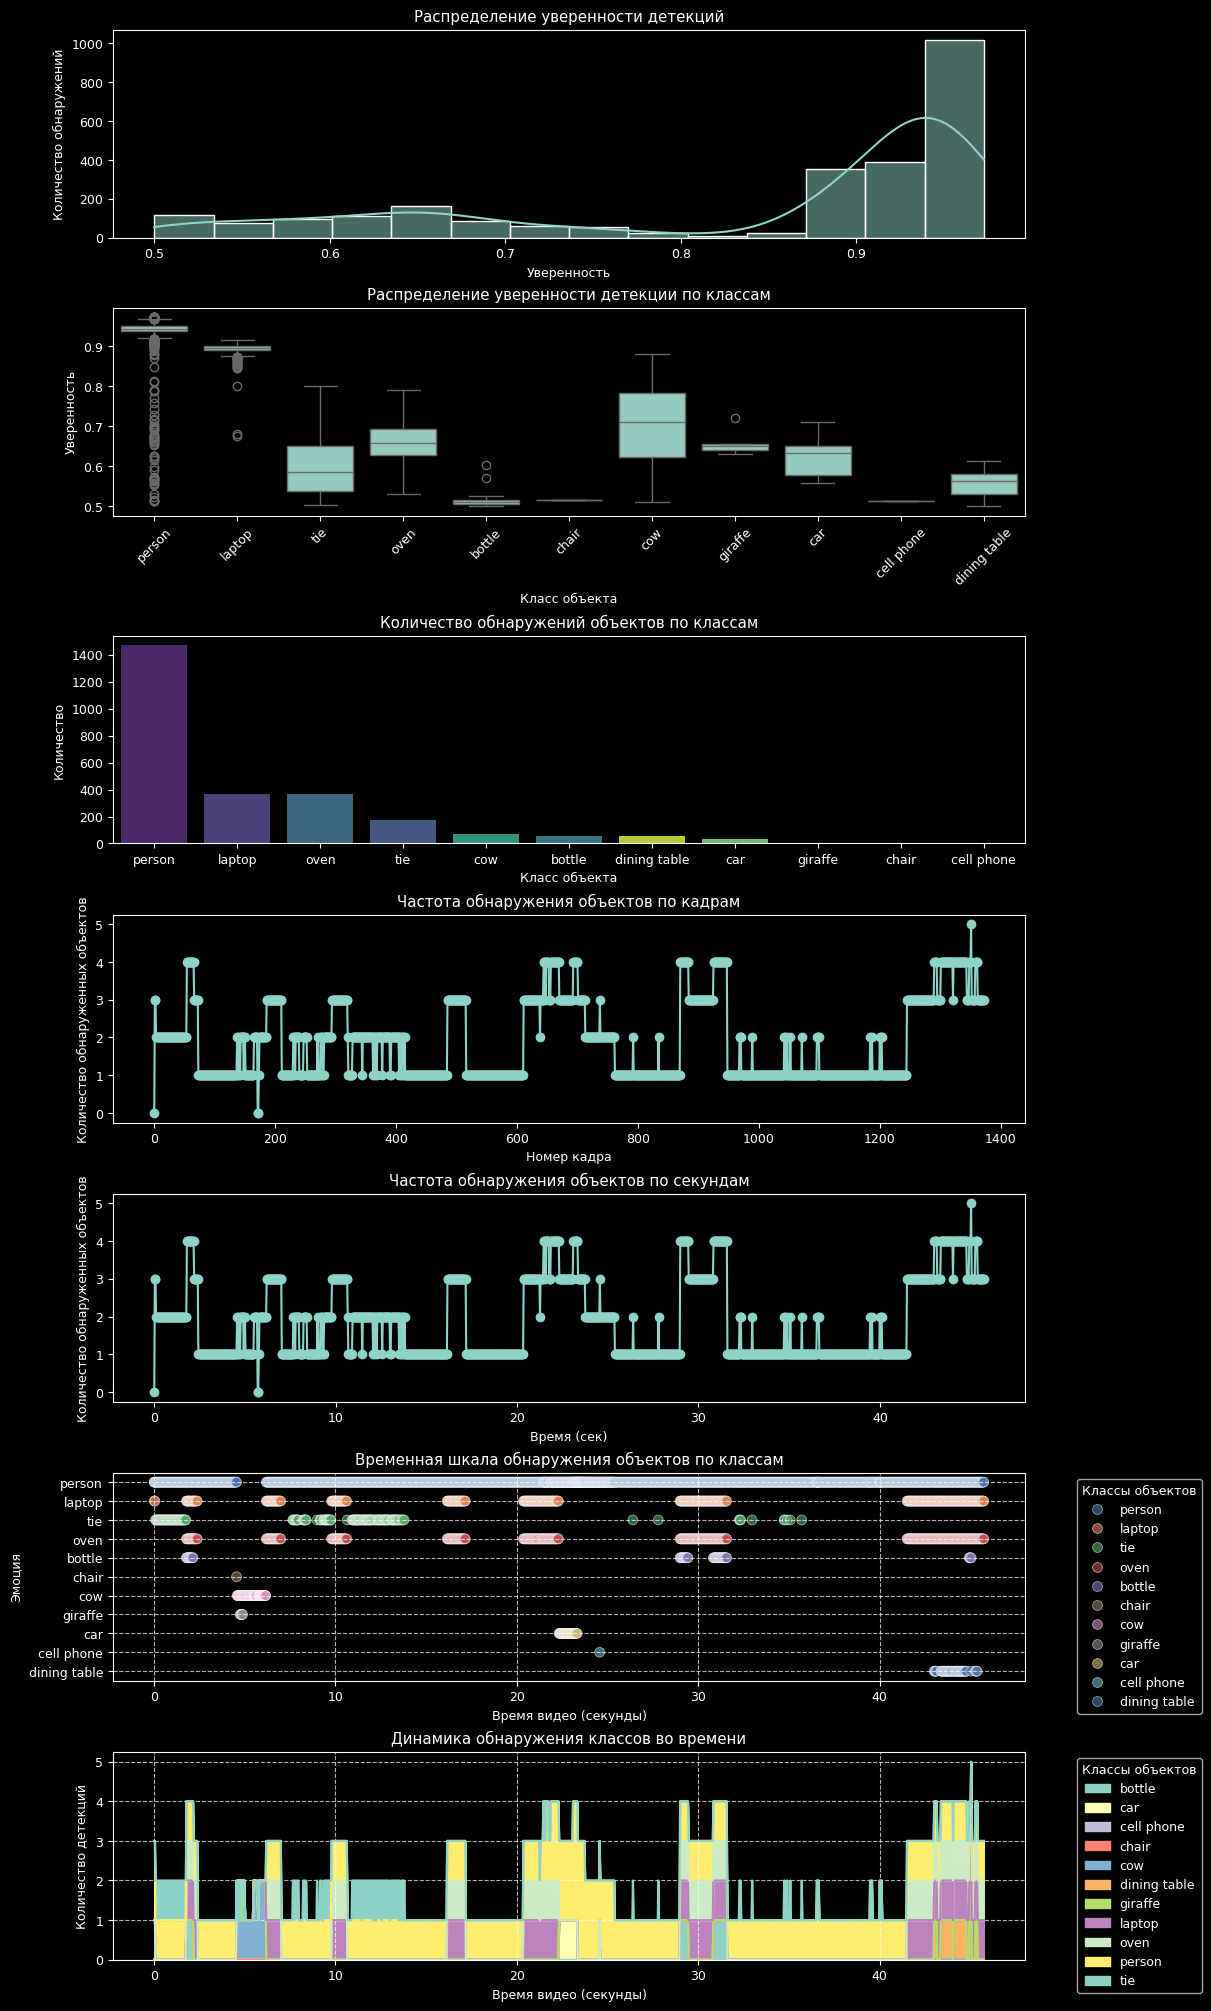

In [44]:
# функция для получения фигуры matplotlib с графиками
def get_matplotlib_fig(df: pd.DataFrame):
    fig, axes = plt.subplots(7, 1, constrained_layout=True)


    sns.histplot(data=df_clean['conf'], kde=True, ax=axes[0])
    axes[0].set_title('Распределение уверенности детекций')
    axes[0].set_xlabel('Уверенность')
    axes[0].set_ylabel('Количество обнаружений')


    sns.boxplot(data=df_clean, x='class_name', y='conf', ax=axes[1])
    axes[1].set_title('Распределение уверенности детекции по классам')
    axes[1].set_xlabel('Класс объекта')
    axes[1].set_ylabel('Уверенность')
    axes[1].tick_params(axis='x', labelrotation=45)


    sns.countplot(
        data=df_clean,
        x='class_name',
        hue='class_name',
        order=df_clean['class_name'].value_counts().index,
        palette='viridis',
        legend=False,
        ax=axes[2],
        )
    axes[2].set_title('Количество обнаружений объектов по классам')
    axes[2].set_xlabel('Класс объекта')
    axes[2].set_ylabel('Количество')


    face_count_per_frame = df.groupby('frame_number')['box_detected'].sum()
    axes[3].plot(face_count_per_frame.index, face_count_per_frame.values, marker='o', linestyle='-')
    axes[3].set_title('Частота обнаружения объектов по кадрам')
    axes[3].set_xlabel('Номер кадра')
    axes[3].set_ylabel('Количество обнаруженных объектов')


    face_count_per_frame = df.groupby('frame_sec')['box_detected'].sum()
    axes[4].plot(face_count_per_frame.index, face_count_per_frame.values, marker='o', linestyle='-')
    axes[4].set_title('Частота обнаружения объектов по секундам')
    axes[4].set_xlabel('Время (сек)')
    axes[4].set_ylabel('Количество обнаруженных объектов')


    sns.scatterplot(
        data=df_clean,
        x='frame_sec',
        y='class_name',
        hue='class_name',
        palette='deep',
        s=50,
        alpha=0.6,
        legend=True,
        ax=axes[5],
        )
    axes[5].set_title('Временная шкала обнаружения объектов по классам')
    axes[5].set_xlabel('Время видео (секунды)')
    axes[5].set_ylabel('Эмоция')
    axes[5].grid(True, linestyle='--', alpha=0.7)
    axes[5].legend(title='Классы объектов', bbox_to_anchor=(1.05, 1), loc='upper left')


    emotion_timeline = df.pivot_table(index='frame_sec', columns='class_name', aggfunc='size', fill_value=0)
    emotion_timeline.plot(kind='area', stacked=True, ax=axes[6])
    axes[6].set_title('Динамика обнаружения классов во времени')
    axes[6].set_xlabel('Время видео (секунды)')
    axes[6].set_ylabel('Количество детекций')
    axes[6].grid(True, linestyle='--', alpha=0.7)
    axes[6].legend(title='Классы объектов', bbox_to_anchor=(1.05, 1), loc='upper left')

    return fig

fig = get_matplotlib_fig(df)
plt.show()

Отрисовка графиков в Gradio

In [ ]:
import gradio as gr

css = '''.gradio-container {width: 70% !important}'''

with gr.Blocks(css=css) as demo:
    with gr.Tab('Show detection video results'):
        gr.Markdown('#### Отрисовка результатов детекции видео')
        fig = get_matplotlib_fig(df)
        gr.Plot(fig)

demo.launch(debug=True)

# Проверка запуска приложения в Colab/Jupyter

Импорты

In [48]:
import os
import glob
import json
import urllib.request
import shutil
from pathlib import Path
from typing import List, Dict, Union, Tuple, Optional

import numpy as np
import cv2
import torch
import gradio as gr
import yt_dlp
from ultralytics import YOLO

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams.update({'figure.figsize': (12, 20)})
plt.rcParams.update({'font.size': 9})

Дополнительные функции

In [53]:
# ==================== ДЕТЕКЦИЯ ИЗОБРАЖЕНИЙ ============================
# прочитать картинку, найти координаты боксов и отрисовать их
def detect_image(image_path: str, model: YOLO, conf: float, iou: float) -> np.ndarray:
    gr.Progress()(0.5, desc='Детекция изображения...')
    # детекция изображения и отрисовка боксов на нем
    detections = model.predict(source=image_path, conf=conf, iou=iou, verbose=False)
    np_image = detections[0].plot()
    np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)
    # np_image = np_image.copy()[:, :, ::-1]
    return np_image


# =================== ДЕТЕКЦИЯ ВИДЕО ==================================
# прочитать видеофайл, пройтись по кадрам, спредиктить каждый, нарисовать боксы и записать в новое видео
def detect_video(video_path_or_url: str, model: YOLO, conf: float, iou: float) -> Tuple[Path, Path]:
    # прогресс бар интерфейса Gradio
    progress = gr.Progress()
    # если передана ссылка на youtube то сначала загрузить видео по ссылке
    video_path = video_path_or_url
    if 'youtube.com' in video_path_or_url or 'youtu.be' in video_path_or_url:
        # загрузка видео с YouTube
        progress(0.001, desc='Загрузка видео с YouTube...')
        ydl_opts = {'format': 'bestvideo[height<=720]'}
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            video_info_dict = ydl.extract_info(video_path_or_url, download=True)
            video_path = ydl.prepare_filename(video_info_dict)

    # получить кол-во кадров через open-cv (для того чтобы отобразить прогресс бар)
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()

    # инициализация генератора
    generator = model.predict(
        source=video_path,  # путь до видео
        conf=0.5,  # порог уверенности
        iou=0.5,  # порог IOU
        save=True,  # сохранить видео результат на диск
        save_txt=True,  # сохранить результаты детекции в текстовом файле
        save_conf=True,  # сохранять уверенность модели в результатах детекции
        stream=True,  # stream=True возвращает генератор
        verbose=False,  # verbose=False не засоряет вывод инфой о детекции каждого кадра
        )

    # счетчик фреймов для отображения прогресса детекции видео
    frame_number = 0
    # итерация по генератору (в качетсве result возвращаются результаты детекции каждого кадра в формате YOLO Results)
    for result in generator:
        # отображение прогресса детекции видео
        frame_number += 1
        progress((frame_number, num_frames), desc=f'Детекция видео, шаг {frame_number}/{num_frames}')

    # получить путь до видео с результатом в коде
    file_name = Path(result.path).with_suffix('.avi').name
    result_video_path = Path(result.save_dir) / file_name
    # удалить текущее видео (если оно скачано с ютуба чтобы не занимало место)
    Path(video_path).unlink(missing_ok=True)
    return result_video_path


# функция для преобразования аннотаций из текстовых файлов в csv
def get_csv_annotate(result_video_path: Path) -> str:
    if not isinstance(result_video_path, Path):
        return None
    # директория с результатами детекций в виде текстовых файлов
    txts_path = result_video_path.parent / 'labels'
    # получение путей до текстовых файлов которые соотвествуют только текущему видео
    escaped_pattern = glob.escape(result_video_path.stem)
    matching_txts_path = sorted(txts_path.glob(f'{escaped_pattern}_*.txt'), key=os.path.getmtime)
    # список для сбора элементов [frame_number, class_label, x, y, w, h, confidence]
    df_list = []
    # итерация по аннотациям к видео в виде тектсовых файлов и изслечение из них результатов детекций
    for txt_path in matching_txts_path:
        frame_number = int(txt_path.stem.rsplit('_')[-1])
        with open(txt_path) as file:
            df_rows = file.readlines()
            for df_row in df_rows:
                df_row = map(float, df_row.split())
                df_list.append((frame_number, *df_row))

    # создание датафрейма
    column_names = ['frame_number', 'class_label', 'x', 'y', 'w', 'h', 'conf']
    df = pd.DataFrame(df_list, columns=column_names)

    # создание столбца с именами классов
    df.class_label = df.class_label.astype(int)
    class_name_series = df.class_label.map(YOLO_CLASS_NAMES)
    df.insert(loc=1, column='class_name', value=class_name_series)

    # получить значение fps чтобы добавить столбец с секундами
    cap = cv2.VideoCapture(result_video_path)
    frames_fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()

    # создание столбца со значение м секунды текущего кадра
    frame_sec_series = df.frame_number / frames_fps
    df.insert(loc=1, column='frame_sec', value=frame_sec_series)

    # заполнение отсутсвующих кадров в датафрейме значениями Nan,
    # чтобы каждая строка датафрейма представляла каждый кадр видео
    full_frames = pd.DataFrame({'frame_number': range(total_frames)})
    df = pd.merge(full_frames, df, on='frame_number', how='outer')
    df.frame_sec = df.frame_number / frames_fps
    df['box_detected'] = df['class_name'].notna().astype(int)

    # сохранение датафрейма на диск в формате cvs
    result_csv_path = f'{result_video_path.parent / result_video_path.stem}_annotations.csv'
    df.to_csv(result_csv_path, index=False)
    return result_csv_path


# функция для получения фигуры matplotlib с графиками
def get_matplotlib_fig(csv_annotations_path: str):
    df = pd.read_csv(csv_annotations_path)
    df_clean = df.dropna(subset=['class_name'])

    fig, axes = plt.subplots(7, 1, figsize=(10, 20), constrained_layout=True)

    # ---------------------------------------------------
    sns.histplot(data=df_clean['conf'], kde=True, ax=axes[0])
    axes[0].set_title('Распределение уверенности детекций')
    axes[0].set_xlabel('Уверенность')
    axes[0].set_ylabel('Количество обнаружений')

    # ---------------------------------------------------
    sns.boxplot(data=df_clean, x='class_name', y='conf', ax=axes[1])
    axes[1].set_title('Распределение уверенности детекции по классам')
    axes[1].set_xlabel('Класс объекта')
    axes[1].set_ylabel('Уверенность')
    axes[1].tick_params(axis='x', labelrotation=45)

    # ---------------------------------------------------
    sns.countplot(
        data=df_clean,
        x='class_name',
        hue='class_name',
        order=df_clean['class_name'].value_counts().index,
        palette='viridis',
        legend=False,
        ax=axes[2],
        )
    axes[2].set_title('Количество обнаружений объектов по классам')
    axes[2].set_xlabel('Класс объекта')
    axes[2].set_ylabel('Количество')

    # ---------------------------------------------------
    face_count_per_frame = df.groupby('frame_number')['box_detected'].sum()
    axes[3].plot(face_count_per_frame.index, face_count_per_frame.values, marker='o', linestyle='-')
    axes[3].set_title('Частота обнаружения объектов по кадрам')
    axes[3].set_xlabel('Номер кадра')
    axes[3].set_ylabel('Количество обнаруженных объектов')

    # ---------------------------------------------------
    face_count_per_frame = df.groupby('frame_sec')['box_detected'].sum()
    axes[4].plot(face_count_per_frame.index, face_count_per_frame.values, marker='o', linestyle='-')
    axes[4].set_title('Частота обнаружения объектов по секундам')
    axes[4].set_xlabel('Время (сек)')
    axes[4].set_ylabel('Количество обнаруженных объектов')

    # ---------------------------------------------------
    sns.scatterplot(
        data=df_clean,
        x='frame_sec',
        y='class_name',
        hue='class_name',
        palette='deep',
        s=50,
        alpha=0.6,
        legend=True,
        ax=axes[5],
        )
    axes[5].set_title('Временная шкала обнаружения объектов по классам')
    axes[5].set_xlabel('Время видео (секунды)')
    axes[5].set_ylabel('Эмоция')
    axes[5].grid(True, linestyle='--', alpha=0.7)
    axes[5].legend(title='Классы объектов', bbox_to_anchor=(1.05, 1), loc='upper left')

    # ---------------------------------------------------
    emotion_timeline = df.pivot_table(index='frame_sec', columns='class_name', aggfunc='size', fill_value=0)
    emotion_timeline.plot(kind='area', stacked=True, ax=axes[6])
    axes[6].set_title('Динамика обнаружения классов во времени')
    axes[6].set_xlabel('Время видео (секунды)')
    axes[6].set_ylabel('Количество детекций')
    axes[6].grid(True, linestyle='--', alpha=0.7)
    axes[6].legend(title='Классы объектов', bbox_to_anchor=(1.05, 1), loc='upper left')

    return fig

Инициализация модели

In [54]:
# путь для загрузки моделей
MODELS_PATH = Path('models')
MODELS_PATH.mkdir(exist_ok=True)

# словарь с ссылками на файлы моделей YOLOv8
MODELS = {
    'yolo11n.pt': 'https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt',
    'yolo11s.pt': 'https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt',
    'yolo11m.pt': 'https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m.pt',
    'yolo11l.pt': 'https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt',
    'yolo11x.pt': 'https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11x.pt',
}
MODEL_NAMES = list(MODELS.keys())

# словарь с индексами и названиями классов
YOLO_CLASS_NAMES = json.loads(Path('yolo_classes.json').read_text())
YOLO_CLASS_NAMES = {int(k): v for k, v in YOLO_CLASS_NAMES.items()}

# загрузка весов модели на диск
def download_model(model_name: str):
    model_path = MODELS_PATH / model_name
    if not model_path.exists():
        urllib.request.urlretrieve(MODELS[model_name], model_path)
    return str(model_path)


# инициализаиця модели
model_path = download_model(MODEL_NAMES[0])
default_model = YOLO(model_path)
YOLO_CLASS_NAMES = default_model.names

# форматы медиа
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png']
VIDEO_EXTENSIONS = ['.mp4', '.avi']

Основные функции и запуск интерфейса

In [ ]:
# =================== ДОП ФУНКЦИИ ИНТРЕФЕЙСА ==============================

# загрузка новой модели и ее инициализация
def change_model(model_state: Dict[str, YOLO], model_name: str):
    progress = gr.Progress()
    progress(0.3, desc='Загрузка модели')
    model_path = download_model(model_name)
    progress(0.7, desc='Инициализация модели')
    model_state['model'] = YOLO(model_path)
    return f"Модель {model_name} инициализирована"


# функция детекции изображения, видео или ссылки на ютуб
def detect(file_path: str, file_link: str, model_state: Dict[str, YOLO], conf: float, iou: float):
    model = model_state['model']
    # если передана ссылка на ютуб то если вдруг и передан файл то ссылка в приоритете
    if file_link:
        file_path = file_link
    # получение расширения файла
    file_ext = f'.{file_path.rsplit(".")[-1]}'
    # детекция картинки
    if file_ext in IMAGE_EXTENSIONS:
        np_image = detect_image(file_path, model, conf, iou)
        return np_image, "Детекция завершена, открытие изображения..."
    # детекция видео или ссылки на ютуб
    elif file_ext in VIDEO_EXTENSIONS or 'youtube.com' in file_link:
        video_path = detect_video(file_path, model, conf, iou)
        return video_path, "Детекция завершена, конвертация и открытие видео..."
    else:
        gr.Info('Неверный формат изображения или видео...')
        return None, None

# =================== КОМПОНЕНТЫ ИНТРЕФЕЙСА ==============================

# компоненты gradio для показа результатов - картинки или видео
def get_output_media_components(detect_result: Optional[Union[np.ndarray, str, Path]] = None):
    # видимость компонент меняется в зависимости от типа данных результата детекции
    # если на выходе картинка в формате numpy то сделать видимым компонент gr.Image
    visible = isinstance(detect_result, np.ndarray)
    image_output = gr.Image(
        value=detect_result if visible else None,
        type="numpy",
        width=640,
        height=480,
        visible=visible,
        label='Output',
        )
    # если на выходе путь до видео то сделать видимым компонент gr.Video
    visible = isinstance(detect_result, (str, Path))
    video_output = gr.Video(
        value=detect_result if visible else None,
        width=640,
        height=480,
        visible=visible,
        label='Output',
        )
    # кнопка удаления компонента с результатом
    clear_btn = gr.Button(
        value='Clear',
        scale=0,
        visible=detect_result is not None,
        )
    return image_output, video_output, clear_btn


# =================== КНОПКИ ПРИЛОЖЕНИЯ ==========================

# кнопка загрузки csv аннотаций к фидео - будет видна если путь до csv сущестует
def get_download_csv_btn(csv_annotations_path: Optional[Path] = None):
    # кнопка скачать аннотации в формате csv
    download_csv_btn = gr.DownloadButton(
        label='Скачать csv аннотации к видео',
        value=csv_annotations_path,
        scale=0,
        visible=csv_annotations_path is not None,
        )
    return download_csv_btn

# =================== ИНТЕРФЕЙС ПРИЛОЖЕНИЯ ==========================

# css для уменьшения ширины окна всего приложения
css = '''
.gradio-container { width: 70% !important }
'''

# описание элементов приложения
with gr.Blocks(css=css) as demo:
    # страница детекции видео
    with gr.Tab('Detection image / video'):
        # заголовок с названием приложения
        gr.HTML("""<h3 style='text-align: center'>YOLOv8 Detector</h3>""")
        # словарь для хранения экземпляра текущей выбранной модели YOLO
        model_state = gr.State({'model': default_model})
        # результат детекции - сюда будет записываться картинка или путь до видео
        detect_result = gr.State(None)
        # путь до акннтоаций к видео в формате csv
        csv_annotations_path = gr.State(None)

        with gr.Row():
            with gr.Column():
                # компонент загрузки файлов - картинки или видео
                file_path = gr.File(file_types=['image', 'video'], file_count='single', label='Выберите изображение или видео')
                # текстовое поле для ссылки ютуб
                file_link = gr.Textbox(label='Прямая ссылка на изображение или ссылка на YouTube')
                # название текущей модели YOLO
                model_name = gr.Radio(choices=MODEL_NAMES, value=MODEL_NAMES[0], label='Модель YOLO')
                # настройки уверенности и IOU для детекции
                conf = gr.Slider(0, 1, value=0.5, step=0.05, label='Порог уверенности')
                iou = gr.Slider(0, 1, value=0.7, step=0.1, label='Порог IOU')
                # текстовое поле для отображения текущего статуса приложения и прогресса детекции
                status_message = gr.Textbox(value='Готово к работе', label='Статус')
                # кнопка старта детекции
                detect_btn = gr.Button('Detect', interactive=True)

            with gr.Column():
                # компоненты для показа результатов детекции
                image_output, video_output, clear_btn = get_output_media_components()
                # кнопка хагрузки csv аннотаций к видео
                download_csv_btn = get_download_csv_btn()

        # при нажатии на кнопку смены модели кнопка для детекции становится неактивной
        model_name.change(
            fn=lambda: gr.update(interactive=False),
            inputs=None,
            outputs=[detect_btn],
        # затем происходит загрузка и инициализация новой модели
        ).then(
            fn=change_model,
            inputs=[model_state, model_name],
            outputs=[status_message],
        # затем кнопка детекции снова становится интерактивной
        ).success(
            fn=lambda: gr.update(interactive=True),
            inputs=None,
            outputs=[detect_btn],
        )

        # при нажатии на кнопку детекции происходит старт этого процесса
        detect_btn.click(
            fn=detect,
            inputs=[file_path, file_link, model_state, conf, iou],
            outputs=[detect_result, status_message],
        # затем отрисовка результат детекции
        ).success(
            fn=get_output_media_components,
            inputs=[detect_result],
            outputs=[image_output, video_output, clear_btn],
        # затем обновление сообщения статуса
        ).then(
            fn=lambda: 'Готово к работе',
            inputs=None,
            outputs=[status_message],
        # затем получение csv аннотаций к видео
        ).then(
            fn=get_csv_annotate,
            inputs=[detect_result],
            outputs=[csv_annotations_path],
        # затем получение кнопки загрузки csv аннотаций
        ).success(
            fn=get_download_csv_btn,
            inputs=[csv_annotations_path],
            outputs=[download_csv_btn],
        )

        # функция для очистка папки с результатами детекций
        def clear_results_dir(detect_result):
            if isinstance(detect_result, Path):
                shutil.rmtree(detect_result.parent, ignore_errors=True)

        # при нажатии на кнопку очистить компоненты с результатами убираются
        clear_components = [image_output, video_output, clear_btn, download_csv_btn]
        clear_btn.click(
            fn=lambda: [gr.update(visible=False) for _ in range(len(clear_components))],
            inputs=None,
            outputs=clear_components,
        # очистка папки с результатами детекций
        ).then(
            fn=clear_results_dir,
            inputs=[detect_result],
            outputs=None,
        # сброс переменных состояний
        ).then(
            fn=lambda: (None, None),
            inputs=None,
            outputs=[detect_result, csv_annotations_path]
            )

        # текст с ссылкой на приложение
        gr.HTML("""<h3 style='text-align: center'>
        <a href="https://github.com/sergey21000/yolo_gradio_detector" target='_blank'>GitHub Page</a></h3>
        """)

    # страница отображения результатов детекции видео
    with gr.Tab('Show detection video results'):
        # кнопка для отображения результатов детекции (для отрисовки графиков)
        show_results_btn = gr.Button('Show detection results', scale=1)
        # сообщение в случае недоступности аннотаций (когда видео еще не сдетектировано)
        gr_info = 'To display the results, perform video detection on the first tab'
        # обработка нажатия кнопки
        show_results_btn.click(
            fn=lambda csv_path: get_matplotlib_fig(csv_path) if csv_path is not None else gr.Info(gr_info),
            inputs=[csv_annotations_path],
            outputs=gr.Plot(),
        )

# старт приложения в режиме отладки
demo.launch(server_name='0.0.0.0', debug=True)

# запуск сервера чтобы был виден из контейнера Docker
# demo.launch(server_name='0.0.0.0')

---

**Дополнительно**

Вариант функции `detect_video` с предварительным скачиввнием через `yt_dlp` и записью видео напрямую через `open-cv`

In [ ]:
# =================== ДЕТЕКЦИЯ ВИДЕО ==================================

# прочитать видеофайл, пройтись по кадрам, спредиктить каждый, нарисовать боксы и записать в новое видео
def detect_video(video_path_or_url: str, model: YOLO, conf: float, iou: float) -> str:
    # прогресс бар интерфейса Gradio
    progress = gr.Progress()
    progress(0.001, desc='Загрузка видео')
    video_path = video_path_or_url
    if 'youtube.com' in video_path_or_url:
        # загрузка видео с YouTube
        ydl_opts = {'format': 'bestvideo[height<=720]'}
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            video_info_dict = ydl.extract_info(video_path_or_url, download=True)
            video_path = ydl.prepare_filename(video_info_dict)

    # открытие видео на чтение
    read_cap = cv2.VideoCapture(video_path)

    # получение параметров видео - ширина, высота, FPS и кол-во вреймов
    # через cap.set их можно установить например установить ширину cap.set(3, 640)
    frames_width = int(read_cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 3
    frames_height = int(read_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 4
    frames_fps = int(read_cap.get(cv2.CAP_PROP_FPS))  # 5
    total_frames = int(read_cap.get(cv2.CAP_PROP_FRAME_COUNT))  # 7

    # название для видео в которое будет записывать кадры
    result_video_path = "result_video.mp4"

    # объект для записи видео, параметры высоты и ширины должны совпадать с размерами передаваемых кадров
    write_cap = cv2.VideoWriter(
        filename=result_video_path,
        fourcc=cv2.VideoWriter_fourcc(*'mp4v'),  # mp4v, avc1, x264, h264, fmp4, theo, VP90, XVID, DIVX, MJPG
        fps=frames_fps,  # FPS
        frameSize=(frames_width, frames_height),
        )

    # счетчик фреймов для отображения прогресса детекции видео
    frame_number = 0

    # считывание исходного видео покадрово в бесконечном цикле
    while read_cap.isOpened():
        # чтение флага того что фрейм прочитался и сам фрейм в формате numpy
        ret, frame = read_cap.read()

        # если фрейм прочитался то производим детекцию и записываем результат в новое видео write_cap
        if ret:
            detections = model.predict(source=frame, conf=conf, iou=iou, verbose=False)
            result_np_image = detections[0].plot()
            # записать фрейм в видео (в формате BGR)
            write_cap.write(result_np_image)
            # отображение прогресса детекции видео
            frame_number += 1
            progress((frame_number, total_frames), desc=f'Детекция видео, шаг {frame_number}/{total_frames}')

        # если фреймы закончились или не прочитались по другим причинам то останавливаем бесконечный цикл
        else:
            break

    # в конце нужно закрыть все объекты для чтения/записи видео и все лишнее
    write_cap.release()
    read_cap.release()
    cv2.destroyAllWindows()

    return result_video_path

# Структура приложения

---

Код файлов проекта находится в репозитории  
https://github.com/sergey21000/yolo-detector

---

Скриншот приложения  
<img src="https://github.com/sergey21000/yolo-detector/blob/main/screenshots/main.png?raw=true" width=100%>

---

**Структура проекта**:  
 - 📁 `models`
 - `requirements.txt`
 - `app.py`
 - `utils.py`


---

**Установка и запуск:**

1. Создание и активация виртуального окружения (опционально)

 Создание окружения:
 ```
python3 -m venv env
 ```
 Активация окружения:
 - Linux
```
source env/bin/activate
```

 - Windows
```
env\Scripts\activate.bat
```

2. Установка библиотек
 - с поддержкой CPU
 ```
 pip install -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cpu
 ```

 - с поддержкой CUDA 12.4
 ```
 pip install -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cu124
 ```
[Страница](https://pytorch.org/get-started/locally/#start-locally) устанвки Pytorch где можно выбрать `--extra-index-url` для других версий CUDA

3. Запуск приложения
```
python3 app.py
```
 Перейти в браузере http://localhost:7860/ после того как появится надпись `Running on local URL:  http://0.0.0.0:7860`

---

**Содержимое `requirements.txt`**
```
ultralytics>=8,<9
gradio>4
yt_dlp
```

---
Версия `Python:` `3.8+` (проверено на `3.10`)

При установке `ultralytics` такие библиотеки как `torch` будут установлены в комплекте

In [ ]:
# текущие версии библиотек от 10/2024
!pip list | grep -P "ultralytics|gradio|opencv-python|gdown|yt-dlp"

# gdown                              5.2.0
# gradio                             5.4.0
# gradio_client                      1.4.2
# opencv-python                      4.10.0.84
# opencv-python-headless             4.10.0.84
# ultralytics                        8.3.25
# ultralytics-thop                   2.0.10
# yt-dlp                             2024.8.6

gdown                              5.2.0
gradio                             5.4.0
gradio_client                      1.4.2
opencv-python                      4.10.0.84
opencv-python-headless             4.10.0.84
ultralytics                        8.3.25
ultralytics-thop                   2.0.10
yt-dlp                             2024.8.6


# Сборка Docker образа и запуск контейнера

---

Страница образов `Ultralytics` на Docker Hub  
https://hub.docker.com/r/ultralytics/ultralytics

Документация по Docker `Ultralytics`  
https://docs.ultralytics.com/guides/docker-quickstart/

Содержимое всех файлов кроме `*docker*` такое же как в разделе `Структура и код приложения`

---

**Структура проекта**:  
 - 📁 `models`
 - `.dockerignore`
 - `Dockerfile-cpu`
 - `Dockerfile-cuda`
 - `requirements.txt`
 - `app.py`
 - `utils.py`


---

**Сборка образа и запуск контейнера:**

1. Сборка образа  

 - с поддержкой CPU
```
docker build -t yolo-detector:cpu -f Dockerfile-cpu .
```

 - с поддержкой CUDA
```
docker build -t yolo-detector:cuda -f Dockerfile-cuda .
```

2. Запуск контейнера на 7860 порту с пробросом папок через `docker volumes`
 - с поддержкой CPU
```
docker run -it -p 7860:7860 -v ./models:/app/models --name yolo-detector yolo-detector:cpu
```

 - с поддержкой CUDA
```
docker run -it --gpus all -p 7860:7860 -v ./models:/app/models --name yolo-detector yolo-detector:cuda
```

Открыть в браузере адрес http://localhost:7860/  
Приложение доступно через несколько секунд после запуска

---

**Содержимое `.dockerignore`:**  
```
__pycache__
env*
runs*
models/
*.ipynb
```

---
*Варианты Docker образов из официальных готовых образов `Ultralytics`*  

**Содержимое `Dockerfile-cpu`**
```
FROM ultralytics/ultralytics:latest-cpu
WORKDIR /app
RUN apt-get update && apt-get install --no-install-recommends -y ffmpeg
RUN pip install --no-cache-dir gradio yt_dlp
COPY app.py utils.py yolo_classes.json .
EXPOSE 7860
CMD ["python3", "app.py"]
```

**Содержимое `Dockerfile-cuda`**
```
FROM ultralytics/ultralytics:latest
WORKDIR /app
RUN apt-get update && apt-get install --no-install-recommends -y ffmpeg
ENV PATH="/usr/bin:${PATH}"
RUN pip install --no-cache-dir gradio yt_dlp
COPY app.py utils.py yolo_classes.json .
EXPOSE 7860
CMD ["python3", "app.py"]
```

Библиотека `ffmpeg` устанавливается чтобы Gradio автоматически ковертировал видео перед отображением в браузере

Переменная `ENV PATH="/usr/bin:${PATH}"` устанавливается потому что в образе `ultralytics` для CUDA библиотека `ffmpeg` установлена в `conda` и ее версия старая - в ней нет кодека `h264` для отображения сконвертированного видео в браузере, поэтому ставим на первое место только что установленную `apt-get install ffmpeg`

Образ `ultralytics/ultralytics:latest-cpu` занимает 1.7 GB (сжатый) и 5.33 GB (несжатый)  
Образ `ultralytics/ultralytics:latest` занимает 6.04 GB (сжатый) и 14.2 GB (несжатый)  


---

**Дополнительно**

---
*Варианты Docker образов из образов `Python` и `Nvidia`*

**Содержимое `Dockerfile-cpu`**
```
FROM python:3.10
WORKDIR /app
COPY . .
RUN pip install --no-cache-dir -r requirements-cpu.txt
EXPOSE 7860
CMD ["python3", "app.py"]
```

**Содержимое `Dockerfile-cuda`**
```
FROM nvidia/cuda:12.2.2-cudnn8-runtime-ubuntu22.04
WORKDIR /app
COPY . .
RUN apt-get update \
	&& apt-get install --no-install-recommends -y python3-pip ffmpeg libgl1 libglib2.0-0
RUN pip install --no-cache-dir -r requirements-cuda.txt
EXPOSE 7860
CMD ["python3", "app.py"]
```

Для других версий CUDA заменить в `Dockerfile-cuda` соответствующий базовый образ вместо  
```
FROM nvidia/cuda:12.1.1-devel-ubuntu22.04
```

Образ CPU занимает 2.65GB  
Образ CUDA занимает 13.9GB